In [1]:
import geopandas
from matplotlib import pyplot as plt
import folium
from mpl_toolkits.axes_grid1 import make_axes_locatable 

In [2]:

#plot the spatial DF as a map:

In [7]:
wa_puma = geopandas.read_file("data/raw/tl_2017_53_puma10.shp")
wa_puma = wa_puma.to_crs(epsg='3857') # convert shape file data to web mercator (ESPG 3857)

In [8]:
def is_county(puma):
    
    '''this function takes a string input and checks if it is in the respective list which represent the regions: King County
    and South King County. It returns a 0 for the greater washinton area, 1 for King County areas that are NOT south king county
   and 2 for South King County. It is meant to use as apart of a .map(lambda) style syntax to apply across a Pandas Datafram.'''
   
    king_counties = ['11606', '11607', '11608', '11609', '11610', '11611', '11612', '11613', '11614', '11615', '11616'] 
    s_king_counties = ['11610', '11613', '11614', '11615', '11611', '11612']
    if puma in s_king_counties:
        return 2
    elif puma in king_counties:
        return 1
    else:
        return 0



In [9]:
#Creating a new column to classify each puma as either Washington, King County, or South King County
wa_puma["king_county"]=wa_puma["PUMACE10"].map(lambda x: is_county(x))
wa_puma.head()

,STATEFP10,PUMACE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry,king_county
0,53,10200,5310200,"Skagit, Island & San Juan Counties PUMA",G6120,S,5470622131,2441658886,+48.4470835,-122.1737477,"POLYGON ((-13630427.776 6214883.579, -13629607...",0
1,53,10100,5310100,Whatcom County--Bellingham City PUMA,G6120,S,5459332804,1028183246,+48.8426531,-121.8364325,"POLYGON ((-13626220.233 6275252.513, -13626192...",0
2,53,10400,5310400,"Stevens, Okanogan, Pend Oreille & Ferry Counti...",G6120,S,29389124389,489162432,+48.5031090,-118.7866777,"POLYGON ((-13152240.431 6088021.096, -13152284...",0
3,53,10504,5310504,Spokane County (Outer)--Cheney City PUMA,G6120,S,3983412021,35812133,+47.5972847,-117.1210417,"POLYGON ((-13036099.694 6042245.642, -13036098...",0
4,53,10503,5310503,Spokane County (East Central)--Greater Spokane...,G6120,S,270926976,5004332,+47.6561281,-117.1818649,"POLYGON ((-13041672.570 6057042.051, -13041645...",0


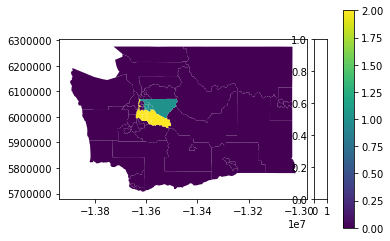

In [10]:
#Create a map to diplay the King County classified data. 

fig, ax = plt.subplots(1,1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
wa_puma.plot(column = "king_county", ax=ax, legend = True);



In [ ]:
# using folium for basemap 



m = folium.Map([47.6485, -122.3502], zoom_start=10)

folium.GeoJson(
    wa_puma,
).add_to(m)

# m.save(os.path.join('results', 'GeoJSON_and_choropleth_3.html'))

m

# data_map.save('data_map.html')

In [28]:
my_map = folium.Map(location=[45.372, -121.6972],
                    zoom_start=12,
                    tiles='2017-07-03_washington_seattle.mbtiles', attr='Mapbox Attribution',
                    )
my_map